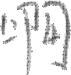

啊


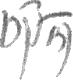

啊


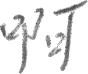

啊


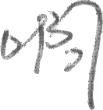

啊


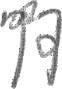

啊


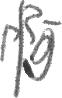

啊


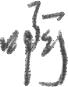

啊


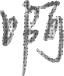

啊


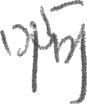

啊


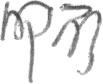

啊


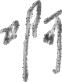

啊


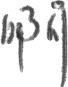

啊


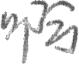

啊


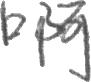

啊


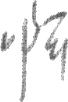

啊


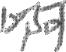

啊


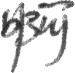

啊


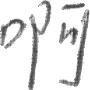

啊


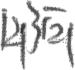

啊


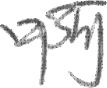

啊


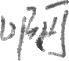

啊


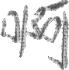

啊


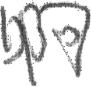

啊


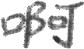

啊


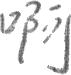

啊


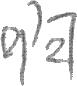

啊


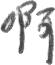

啊


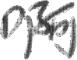

啊


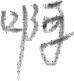

啊


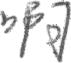

啊


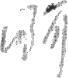

啊


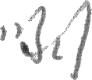

啊


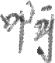

啊


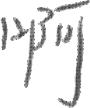

啊


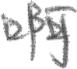

啊


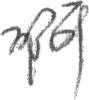

啊


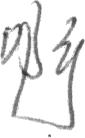

啊


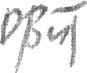

啊


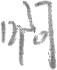

啊


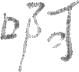

啊


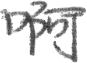

啊


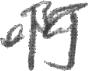

啊


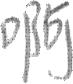

啊


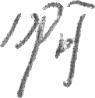

啊


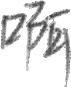

啊


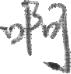

啊


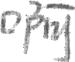

啊


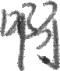

啊


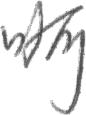

啊


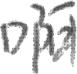

啊


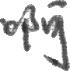

啊


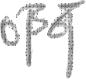

啊


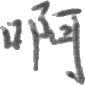

啊


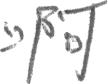

啊


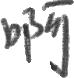

啊


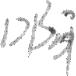

啊


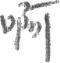

啊


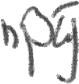

啊


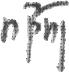

啊


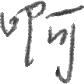

啊


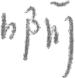

啊


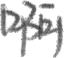

啊


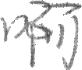

啊


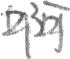

啊


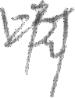

啊


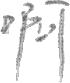

啊


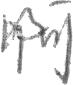

啊


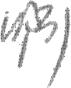

啊


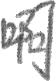

啊


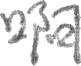

啊


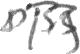

啊


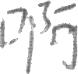

啊


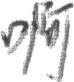

啊


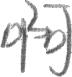

啊


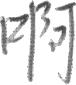

啊


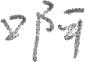

啊


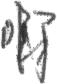

啊


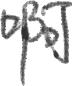

啊


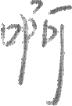

啊


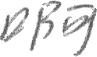

啊


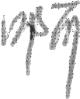

啊


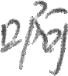

啊


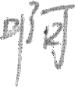

啊


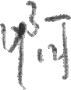

啊


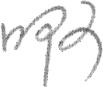

啊


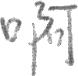

啊


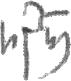

啊


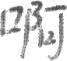

啊


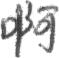

啊


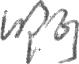

啊


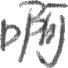

啊


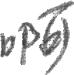

啊


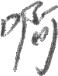

啊


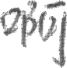

啊


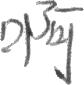

啊


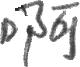

啊


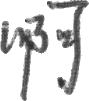

啊


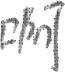

啊


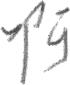

啊


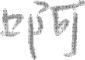

啊


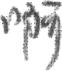

啊


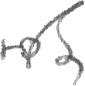

啊


In [6]:
import lmdb
import six
import json
from PIL import Image
from IPython.display import  display
def read_lmdb(lmdb_pathes):
    images=[]
    labels=[]
    for lmdb_path in lmdb_pathes:
        env = lmdb.open(lmdb_path, readonly=True)
        index=0
        word=set()

        i=0
        with env.begin(write=False) as txn:
            nSamples = int(txn.get('num-samples'.encode()))
        with env.begin() as txn:
            for index in range(1,nSamples+1):
                img_key = 'image-%09d' % index
                imgbuf = txn.get(img_key.encode())
                buf = six.BytesIO()
                buf.write(imgbuf)
                buf.seek(0)
                label_key = 'label-%09d' % index
                label = str(txn.get(label_key.encode()).decode('utf-8'))
                image = Image.open(buf).convert('RGB')
                labels.append(label)
                images.append(image)
    return images,labels
# record_path='/home/yuhaiyang/CLIP-OCR/history/8.10-HanziCLIP-baseline-Vit/eval_record.txt'
# with open(record_path,'r',encoding='utf-8') as f:
#     record=json.load(f)
lmdb_pathes=['/home/yuhaiyang/dataset/CharacterZeroShot/test_1000']
# record=record['record']
images,labels=read_lmdb(lmdb_pathes)

# print(len(record))
for i,item in enumerate(images):
    # if item['pre']!=item['label']:
    #     id=item['idx']
    display(images[i])
    print(labels[i])
    # print(item['pre'])
    # print(item['label'])
    if i>100:
        break
